In [1]:
import pandas as pd
import sys
from datetime import date, datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sys.path.insert(0,"..")
bremen_trips = pd.read_csv("../data/processed/trips_weather.csv", index_col=0)
bremen_trips = bremen_trips.sort_values(by=['start_time'], ascending=True)
bremen_trips["start_time"] = pd.to_datetime(bremen_trips["start_time"])

In [3]:

for col in ['start_time']:
    bremen_trips['month'] = pd.DatetimeIndex(bremen_trips['start_time']).month
    bremen_trips['booking_date'] = bremen_trips.start_time.dt.date
    bremen_trips['weekdays'] = pd.DatetimeIndex(bremen_trips['start_time']).weekday

In [4]:
bremen_trips.head()


bike  bike_type  identification          start_time             end_time  \
0  20685         71        12099440 2019-01-20 00:13:00  2019-01-20 00:23:00   
1  20626         71        10278649 2019-01-20 00:16:00  2019-01-20 04:47:00   
2  20617         71        12099749 2019-01-20 00:40:00  2019-01-20 00:44:00   
3  20795         71        12099872 2019-01-20 00:47:00  2019-01-20 00:54:00   
4  20813         71         7873840 2019-01-20 00:55:00  2019-01-20 23:10:00   

   duration_sec  start_lng  start_lat   end_lng    end_lat  ...  dew_point_2m  \
0         600.0   8.812554  53.076481  8.804828  53.084196  ...          -4.8   
1       16260.0   8.884911  53.078923  8.884911  53.078923  ...          -4.8   
2         240.0   8.801623  53.067878  8.793217  53.064244  ...          -4.6   
3         420.0   8.814744  53.084841  8.801135  53.094596  ...          -4.6   
4       80100.0   8.845743  53.106418  8.845743  53.106418  ...          -4.1   

   max_at_2m  mean_speed_h/s  direction_degree_x  max_m/s min_mean_m/s  \
0       -3.4             2.6                80.0      3.1          2.1   
1       -3.4             2.6                80.0      3.1          2.1   
2       -3.6             2.6                80.0      3.1          2.4   
3       -3.6             2.6                80.0      3.1          2.4   
4       -3.2             2.4                80.0      2.6          2.1   

   max_mean_m/s  direction_degree_y  min   mm  
0           2.6                80.0  0.0  0.0  
1           2.6                80.0  0.0  0.0  
2           2.6                80.0  0.0  0.0  
3           2.6                80.0  0.0  0.0  
4           2.6                80.0  0.0  0.0  

[5 rows x 35 columns]

In [5]:
bremen_trips['duration_min'] = bremen_trips['duration_sec']/60

In [6]:
# drop entries with booking durations longer than 2 days
# bremen_trips = bremen_trips[bremen_trips['duration_min'] < 200]
# bremen_trips = bremen_trips[(bremen_trips['start_place'] != 0) & (bremen_trips['end_place'] != 0)]
# bremen_trips = bremen_trips[bremen_trips['month'] != 1]

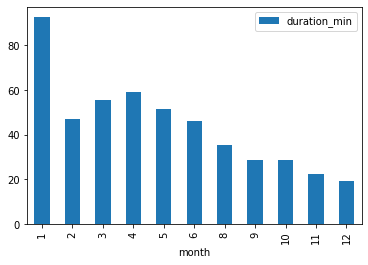

In [7]:
# avg duration per month (looks like we have some outliers)

df = bremen_trips.groupby('month').duration_min.mean().to_frame()
df.plot(kind="bar")

In [8]:
bremen_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143665 entries, 0 to 143664
Data columns (total 35 columns):
bike                  143665 non-null int64
bike_type             143665 non-null int64
identification        143665 non-null int64
start_time            143665 non-null datetime64[ns]
end_time              143665 non-null object
duration_sec          143665 non-null float64
start_lng             143665 non-null float64
start_lat             143665 non-null float64
end_lng               143665 non-null float64
end_lat               143665 non-null float64
start_place           143665 non-null int64
end_place             143665 non-null int64
start_plz             143665 non-null int64
end_plz               143665 non-null int64
month                 143665 non-null int64
booking_date          143665 non-null object
weekdays              143665 non-null int64
duration_min          143665 non-null float64
start_name            36093 non-null object
end_name              31320 no

In [9]:
data_raw = bremen_trips #[['bike','bike_type','identification', 'start_time', 'duration_min', 'start_lng', 'start_lat', 'start_place', 'month', 'weekdays']]

In [10]:
data_raw['hour'] = data_raw['start_time'].dt.hour
data_raw['min'] = data_raw['start_time'].dt.minute
data_raw['day_of_month'] = data_raw['start_time'].dt.day
data_raw.drop(axis = 1, columns = 'start_time', inplace=True)

In [11]:
# get uniformative features meaning that they contain over 95% of the time the same value
num_rows = len(data_raw.index)
low_information_cols = [] #

for col in data_raw.columns:
    cnts = data_raw[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

bike_type: 99.84478%
71    143442
29       223
Name: bike_type, dtype: int64

mm: 95.91271%
0.00    137793
0.03       821
NaN        739
0.04       736
0.06       260
         ...  
1.76         1
1.23         1
1.10         1
0.73         1
1.25         1
Name: mm, Length: 117, dtype: int64



In [12]:
data_raw.drop(columns=["bike_type"], inplace=True)

In [13]:
#data_raw['is_freefloat'] = np.where(data_raw['start_place'] == 0, 1, 0)


In [14]:
data_raw = data_raw.merge(pd.get_dummies(data_raw['start_plz']), left_index=True,right_index=True)

In [52]:
data_raw.dropna(inplace=True)

In [53]:
data_raw.corrwith(data_raw['duration_min'])[:60]

bike                 -0.064734
identification       -0.020385
duration_sec          1.000000
start_lng             0.053890
start_lat             0.026620
end_lng               0.027966
end_lat               0.001249
start_place           0.003293
end_place            -0.005627
start_plz             0.110969
end_plz               0.009275
month                -0.116104
weekdays              0.021738
duration_min          1.000000
temp_2m              -0.029558
humidity_2m          -0.016062
dew_point_2m         -0.051594
max_at_2m            -0.029517
mean_speed_h/s        0.031707
direction_degree_x    0.014891
max_m/s               0.032463
min_mean_m/s          0.026534
max_mean_m/s          0.033036
direction_degree_y    0.017708
min                  -0.007198
mm                    0.012460
hour                 -0.083071
day_of_month          0.021795
28195                -0.068241
28197                 0.041065
28199                -0.017672
28201                -0.002621
28203   

In [18]:
data_raw.keys()

Index([              'bike',     'identification',           'end_time',
             'duration_sec',          'start_lng',          'start_lat',
                  'end_lng',            'end_lat',        'start_place',
                'end_place',          'start_plz',            'end_plz',
                    'month',       'booking_date',           'weekdays',
             'duration_min',         'start_name',           'end_name',
                    'sTime',              'eTime',          'timestamp',
                  'temp_2m',        'humidity_2m',       'dew_point_2m',
                'max_at_2m',     'mean_speed_h/s', 'direction_degree_x',
                  'max_m/s',       'min_mean_m/s',       'max_mean_m/s',
       'direction_degree_y',                'min',                 'mm',
                     'hour',       'day_of_month',                28195,
                      28197,                28199,                28201,
                      28203,                28205, 

In [54]:
#X = data_raw.drop(columns={'end_place','end_lng','end_lat','duration_min','end_time','timestamp','sTime','eTime','booking_date','start_name','end_name','duration_sec','start_plz','end_plz','identification'})
X = data_raw[['start_plz','month']]
y = data_raw['duration_min']

In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10966 entries, 1 to 143657
Data columns (total 2 columns):
start_plz    10966 non-null int64
month        10966 non-null int64
dtypes: int64(2)
memory usage: 257.0 KB


In [56]:
X.head()

start_plz  month
1       28329      1
4       28359      1
14      28195      1
16      28359      1
21      28359      1

In [57]:
from sklearn.model_selection import train_test_split


X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.60, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.60, shuffle=False)

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [131]:
poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train)

In [132]:
lin = LinearRegression()

In [133]:
lin.fit(X_train_poly, y_train)
lin.score(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

0.03643645207144153

In [134]:
X_val_poly = poly.fit_transform(X_val)
lin.score(X_val_poly,y_val)

0.012559039015422544

In [135]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [136]:
parameters = {'max_depth':[2, 3, 4, 5, 7],
              'n_estimators':[1, 10, 25, 50, 100, 256, 512],
              'random_state':[42]}
    
def perform_grid_search(X_data, y_data):
    rf = RandomForestRegressor(criterion='mse')
    
    clf = GridSearchCV(rf, parameters, cv=4, scoring='r2', n_jobs=3)
    
    clf.fit(X_data, y_data)
    
    print(clf.cv_results_['mean_test_score'])
    
    return clf.best_params_['n_estimators'], clf.best_params_['max_depth']

In [137]:
# extract parameters
n_estimator, depth = perform_grid_search(X_train, y_train)
c_random_state = 42
print(n_estimator, depth, c_random_state)

[ 0.00948408  0.01434006  0.01197755  0.01549719  0.01703563  0.01710094
  0.01691182  0.01038098  0.02736511  0.02565955  0.02824473  0.03034348
  0.03091979  0.0300638  -0.02478662  0.02176968  0.01924592  0.02177784
  0.02471591  0.02553426  0.02558391 -0.0747195   0.01529336  0.00885957
  0.01301461  0.01588311  0.01541091  0.0157104  -0.07502949 -0.00744773
 -0.01977203 -0.01238211 -0.00838997 -0.00901166 -0.0069959 ]
256 3 42


In [138]:
rf = RandomForestRegressor(criterion='mse', max_depth=5, n_estimators=512, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=512,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [139]:
y_pred = rf.predict(X_train)

In [142]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [141]:
mean_squared_error(y_train, y_pred)

39053.37382574634

In [143]:
mean_absolute_error(y_train, y_pred)

115.66346428447538